In [1]:
!pip install lda

                                              0.0/356.8 kB ? eta -:--:--
     ------------------------------------- 356.8/356.8 kB 23.1 MB/s eta 0:00:00


## Project: Using Latent Dirichlet Allocation (LDA) for Topic Modelling.

#### The goal of this project is to use LDA in order to derive the topic of newspaper articles from Reuters. The main idea isn't so much as for usage on newspaper itself, but to be able to show it's abilities in usage for chatbot responses in order to determine what the user's query is about. 

#### Such chatbot queries usually are too numerous in order to manually classify. So hence a more efficient way is needed in order to determine this. The dataset within the lda package for Reuters is a good substitute given it's sheer scale and information that is already prepared for this project.

#### What is topic modeling?

#### Topic modeling is a method for unsupervised classification of documents, similar to clustering on numeric data, which finds some natural groups of items (topics) even when we’re not sure what we’re looking for.

#### A document can be a part of multiple topics, kind of like in fuzzy clustering(soft clustering) in which each data point belongs to more than one cluster.

#### What is Latent Dirichlet Allocation?

#### Latent Dirichlet Allocation is a probabilistic model used for topic modeling, a technique in natural language processing and machine learning. LDA assumes that documents are mixtures of topics, and each topic is a mixture of words. The model uncovers the latent topics present in a collection of documents and assigns a probability distribution to each document and word over these topics.

#### The fundamental assumption of LDA is that documents are mixtures of topics, and each topic is a mixture of words. Through an iterative process, the model assigns probabilities to words and documents for each topic, aiming to capture the underlying thematic structure of the data. 

#### The Dirichlet distribution is used to model the distribution of topics in documents and the distribution of words in topics, providing a flexible framework for representing the intricate relationships between words and topics. LDA has proven effective in tasks such as document clustering, topic discovery, and content recommendation, making it a valuable tool for analyzing and organizing large sets of textual information.

In [1]:
import numpy as np
import lda

### Load Reuters Dataset that includes their Titles and Vocabulary

#### The dataset is done in a Document-Term Matrix.

#### In the context of topic modeling, the document-term matrix is a numerical representation of a collection of texts (documents) where each row corresponds to a document, and each column corresponds to a unique term (word) in the entire vocabulary. Each entry in the matrix represents the frequency or occurrence of a specific term in a particular document.

#### So, if you have N documents and M unique terms in the vocabulary, the document-term matrix X will have dimensions N x M. Each element X[i, j] of the matrix represents the count or frequency of the j-th term in the i-th document.

In [2]:
# Show Matrix
X = lda.datasets.load_reuters()
X

array([[1, 0, 1, ..., 0, 0, 0],
       [7, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [3]:
X.shape

(395, 4258)

In [4]:
vocab=lda.datasets.load_reuters_vocab()

In [5]:
# Show Vocabulary
vocab

('church',
 'pope',
 'years',
 'people',
 'mother',
 'last',
 'told',
 'first',
 'world',
 'year',
 'president',
 'teresa',
 'charles',
 'catholic',
 'during',
 'life',
 'u.s',
 'city',
 'public',
 'time',
 'since',
 'family',
 'king',
 'former',
 'british',
 'harriman',
 'against',
 'country',
 'vatican',
 'made',
 'three',
 'hospital',
 'minister',
 'home',
 'died',
 'tuesday',
 'government',
 "n't",
 'million',
 'prince',
 'john',
 'very',
 'war',
 'say',
 'order',
 'day',
 'political',
 'leader',
 'heart',
 'roman',
 'yeltsin',
 'later',
 'france',
 'party',
 'monday',
 'death',
 'clinton',
 'sunday',
 'elvis',
 'state',
 'diana',
 'royal',
 'wednesday',
 'churchill',
 'official',
 'service',
 'including',
 'film',
 'while',
 'week',
 'left',
 'work',
 'paris',
 'around',
 'american',
 'saying',
 'take',
 'doctors',
 'group',
 'son',
 'queen',
 'house',
 'police',
 'national',
 'under',
 'surgery',
 'next',
 'peace',
 'paul',
 'long',
 'ceremony',
 'month',
 'thursday',
 'french',


In [6]:
# Show Titles
titles=lda.datasets.load_reuters_titles()
titles

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20',
 '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany 1996-08-21',
 "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23",
 '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25',
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25',
 "5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA 1996-08-25",
 '6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA 1996-08-26',
 "7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India 1996-08-25",
 '8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA 1996-08-26',
 '9 UK: Charles under fire over prospect of Queen Camilla. LONDON 1996-08-26',
 '10 UK: Britain tells Charles to forget Camilla. LONDON 1996-08-27',
 "11 COTE D'IVOIRE: FEATURE - Quiet homecoming for reprieved Ivory Coast maid. ABIDJAN 1996-08-28",


### Exploratory Data Analysis

#### We will begin EDA on the dataset in order to determine what exactly we are working with.

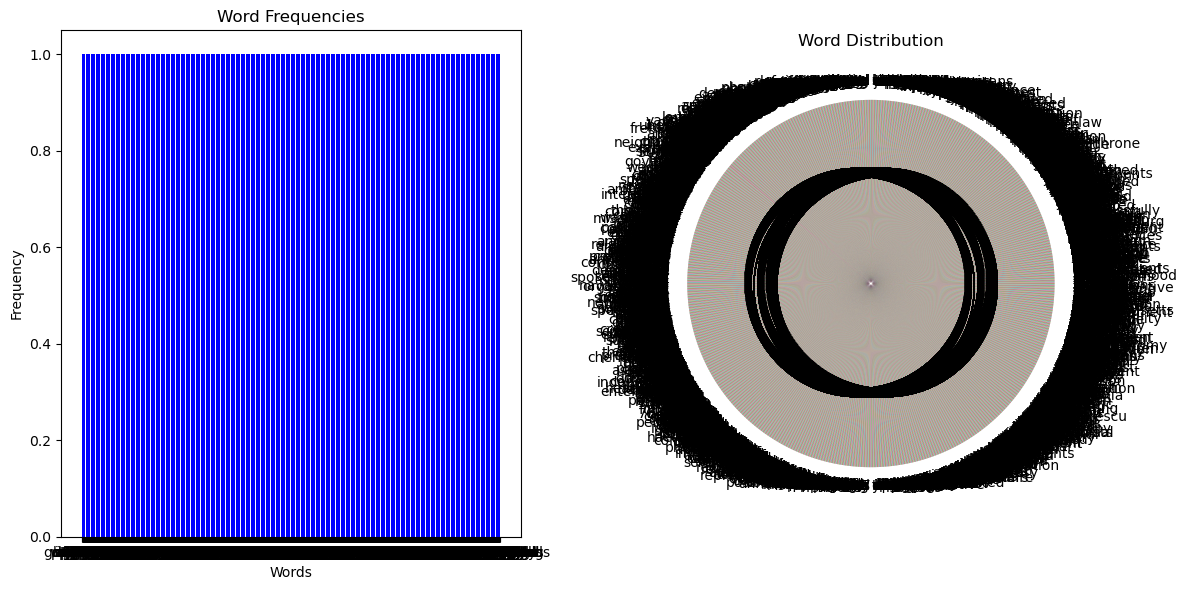

Total words: 4258
Unique words: 4258
Most common word: "church" with a count of 1


In [7]:
import matplotlib.pyplot as plt
from collections import Counter

vocab_counts = Counter(vocab)

# Basic statistics
total_words = len(vocab)
unique_words = len(vocab_counts)
most_common_word, most_common_count = vocab_counts.most_common(1)[0]

# Plotting the distribution of word frequencies
word_frequencies = list(vocab_counts.values())
words = list(vocab_counts.keys())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(words, word_frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies')

plt.subplot(1, 2, 2)
plt.pie(word_frequencies, labels=words, autopct='%1.1f%%', startangle=140)
plt.title('Word Distribution')

plt.tight_layout()
plt.show()

# Print basic statistics
print(f'Total words: {total_words}')
print(f'Unique words: {unique_words}')
print(f'Most common word: "{most_common_word}" with a count of {most_common_count}')

### From the looks of the EDA, it appears that most of the vocabs within the Reuter's dataset are unique values. Hence only "church" has a count of 1 and the distribution looks even throughout.

### There appears to be also 4258 words which is too overwhelming for a plot. We will not examine the titles subset of the data to determine if there are any insights to be gained.

In [8]:
import pandas as pd
#Convert titles into a dataframe
titles_df = pd.DataFrame({'Title': titles})

In [9]:
titles_df

,Title
0,0 UK: Prince Charles spearheads British royal ...
1,1 GERMANY: Historic Dresden church rising from...
2,2 INDIA: Mother Teresa's condition said still ...
3,3 UK: Palace warns British weekly over Charles...
4,"4 INDIA: Mother Teresa, slightly stronger, ble..."
...,...
390,390 CANADA: FEATURE - French-speaking Quebec c...
391,391 BULGARIA: FEATURE - Bulgarian opera stars ...
392,392 USA: Fans end Elvis Presley fete with conc...
393,393 UK: Volcano buries studio where rock legen...


In [10]:
# Basic statistics
total_titles = titles_df.shape[0]
unique_titles = titles_df['Title'].nunique()

# Word count distribution
titles_df['Word_Count'] = titles_df['Title'].apply(lambda x: len(x.split()))


Text(0.5, 1.0, 'Title Length Distribution')

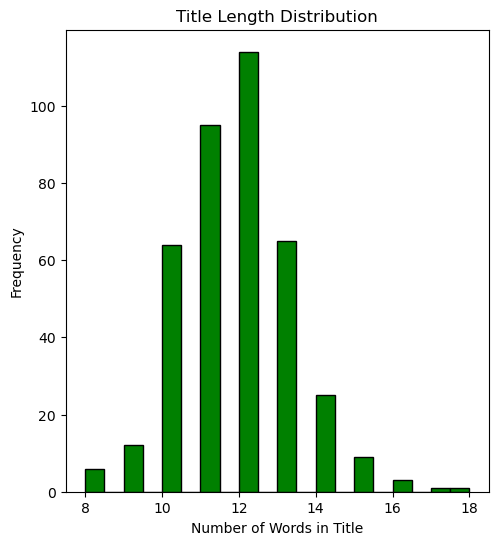

In [11]:
# Plotting the distribution of title lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(titles_df['Word_Count'], bins=20, color='green', edgecolor='black')
plt.xlabel('Number of Words in Title')
plt.ylabel('Frequency')
plt.title('Title Length Distribution')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6692\2251159272.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


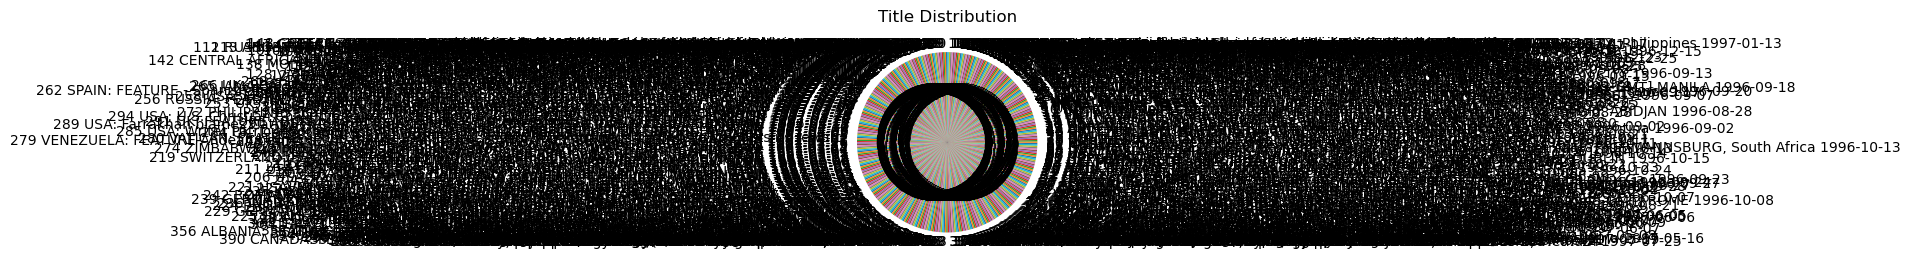

In [12]:
# Pie chart for the distribution of unique titles
title_counts = titles_df['Title'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Title Distribution')

plt.tight_layout()
plt.show()

In [13]:
# Counting the number of unique words in each title
titles_df['Unique_Word_Count'] = titles_df['Title'].apply(lambda x: len(set(x.split())))

# Displaying the number of unique words in each title
print(titles_df[['Title', 'Unique_Word_Count']])

                                                 Title  Unique_Word_Count
0    0 UK: Prince Charles spearheads British royal ...                 10
1    1 GERMANY: Historic Dresden church rising from...                 12
2    2 INDIA: Mother Teresa's condition said still ...                 10
3    3 UK: Palace warns British weekly over Charles...                 11
4    4 INDIA: Mother Teresa, slightly stronger, ble...                 10
..                                                 ...                ...
390  390 CANADA: FEATURE - French-speaking Quebec c...                 12
391  391 BULGARIA: FEATURE - Bulgarian opera stars ...                 12
392  392 USA: Fans end Elvis Presley fete with conc...                 12
393  393 UK: Volcano buries studio where rock legen...                 11
394  394 USA: Joseph Vostal, ex-Kidder muni banker,...                 13

[395 rows x 2 columns]


In [14]:
titles_df[['Title', 'Unique_Word_Count']]

,Title,Unique_Word_Count
0,0 UK: Prince Charles spearheads British royal ...,10
1,1 GERMANY: Historic Dresden church rising from...,12
2,2 INDIA: Mother Teresa's condition said still ...,10
3,3 UK: Palace warns British weekly over Charles...,11
4,"4 INDIA: Mother Teresa, slightly stronger, ble...",10
...,...,...
390,390 CANADA: FEATURE - French-speaking Quebec c...,12
391,391 BULGARIA: FEATURE - Bulgarian opera stars ...,12
392,392 USA: Fans end Elvis Presley fete with conc...,12
393,393 UK: Volcano buries studio where rock legen...,11


### Data Cleaning

In [16]:
#Data Cleaning by dropping the index and resetting it
titles_df = titles_df.drop_duplicates(subset='Title', keep='first').reset_index(drop=True)


In [17]:
word_counts_df = titles_df['Title'].apply(lambda x: pd.Series(x.split())).stack().value_counts().reset_index()
word_counts_df.columns = ['Word', 'Count']

In [18]:
word_counts_df

,Word,Count
0,to,97
1,USA:,88
2,UK:,70
3,LONDON,60
4,-,49
...,...,...
2466,site.,1
2467,national,1
2468,temple,1
2469,dissident,1


In [19]:
#Further Data Cleaning to remove filler words.

filler_words = ['to', 'the', 'and', 'in', 'of', 'on', 'for', 'with', 'a', 'an', 'at', 'is', 'it', 'from']

# Filtering out filler words
word_counts_df = word_counts_df[~word_counts_df['Word'].isin(filler_words)].reset_index(drop=True)


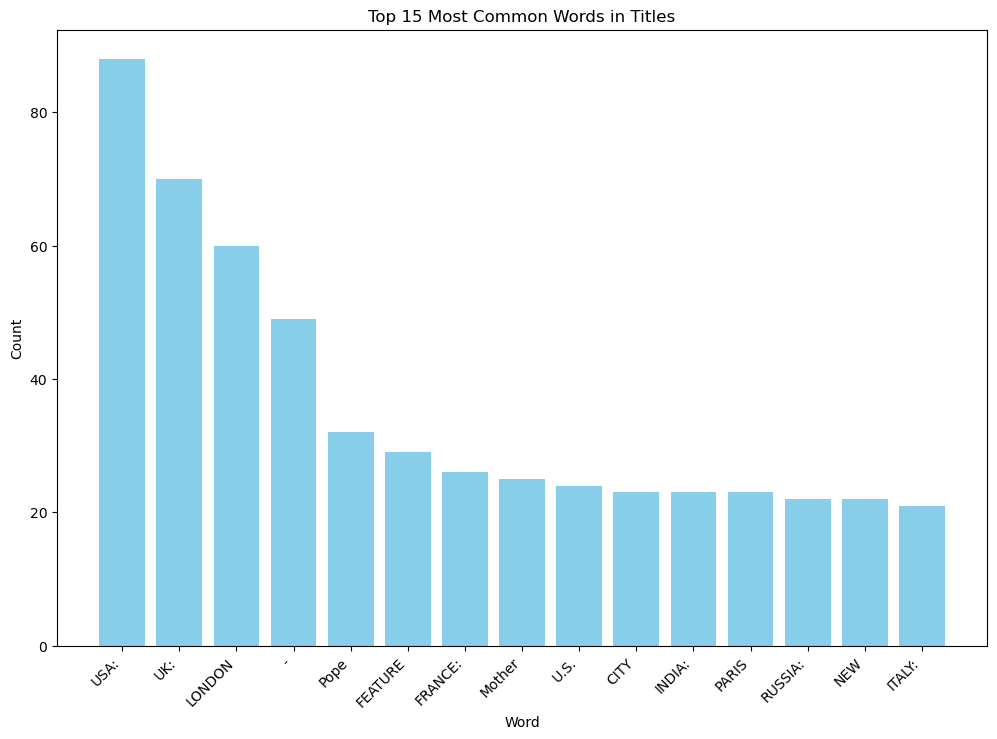

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecting the top 15 most common words
top_words_df = word_counts_df.head(15)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 15 Most Common Words in Titles')
plt.xticks(rotation=45, ha='right')
plt.show()


#### From the EDA performed above we can determine the following:
#### 1. The number of words in the titles follow a normal distribution, with the highest being 12 words within a title.
#### 2. While the distribution can't really be determined due to the sheer scale in the data, making the distribution pie chart look like some jackson pollock's artwork, we can at least determine that the topics from Reuters tend to favour western countries like the US, UK and London rather frequently.
#### 3. Interestingly enough, Reuters also seems to have an inclination to reporting about the Pope. Making the Pope more popular than France in terms of reporting occurances.

### Modelling for Latent Drichlet Allocation

In [32]:
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
model.fit(X)  # model.fit_transform(X) is also available
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -

Topic 0: british churchill sale million major letters west
Topic 1: church government political country state people party
Topic 2: elvis king fans presley life concert young
Topic 3: yeltsin russian russia president kremlin moscow michael
Topic 4: pope vatican paul john surgery hospital pontiff
Topic 5: family funeral police miami versace cunanan city
Topic 6: simpson former years court president wife south
Topic 7: order mother successor election nuns church nirmala
Topic 8: charles prince diana royal king queen parker
Topic 9: film french france against bardot paris poster
Topic 10: germany german war nazi letter christian book
Topic 11: east peace prize award timor quebec belo
Topic 12: n't life show told very love television
Topic 13: years year time last church world people
Topic 14: mother teresa heart calcutta charity nun hospital
Topic 15: city salonika capital buddhist cultural vietnam byzantine
Topic 16: music tour opera singer israel people film
Topic 17: church catholic be

In [33]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: british churchill sale million major letters west
Topic 1: church government political country state people party
Topic 2: elvis king fans presley life concert young
Topic 3: yeltsin russian russia president kremlin moscow michael
Topic 4: pope vatican paul john surgery hospital pontiff
Topic 5: family funeral police miami versace cunanan city
Topic 6: simpson former years court president wife south
Topic 7: order mother successor election nuns church nirmala
Topic 8: charles prince diana royal king queen parker
Topic 9: film french france against bardot paris poster
Topic 10: germany german war nazi letter christian book
Topic 11: east peace prize award timor quebec belo
Topic 12: n't life show told very love television
Topic 13: years year time last church world people
Topic 14: mother teresa heart calcutta charity nun hospital
Topic 15: city salonika capital buddhist cultural vietnam byzantine
Topic 16: music tour opera singer israel people film
Topic 17: church catholic be

#### The above shows the ability for LDA to be used for topic modelling. While not exactly the most 'readable' in terms of how humans understand them, it is still able to determine roughly the keywords and the topics of them.

#### Let's try to improve this using Latent Semantic Analysis.

In [35]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
import numpy as np

In [36]:
X_transposed = X.T

# Apply Latent Semantic Analysis (LSA)
num_topics_lsa = 20
lsa_model = TruncatedSVD(n_components=num_topics_lsa)
lsa_topic_matrix = lsa_model.fit_transform(X_transposed)

# Display the top terms for each topic in LSA
n_top_words_lsa = 8
terms_lsa = np.array(vocab)

for i, topic in enumerate(lsa_model.components_):
    top_terms_idx = topic.argsort()[-n_top_words_lsa:][::-1]
    top_terms = terms_lsa[top_terms_idx]
    print(f"LSA Topic {i}: {', '.join(top_terms)}")

LSA Topic 0: divorce, spokesman, minister, take, including, week, saying, american
LSA Topic 1: divorce, minister, saying, american, take, week, spokesman, including
LSA Topic 2: last, first, world, miami, mother, catholic, orthodox, charles
LSA Topic 3: black, published, tour, child, white, last, first, world
LSA Topic 4: archbishop, u.s, small, president, during, against, year, life
LSA Topic 5: give, pontiff, go, london, help, foreign, outside, earlier
LSA Topic 6: television, members, held, prime, never, mass, following, pontiff
LSA Topic 7: brought, appendix, big, sent, stay, jews, cancer, christmas
LSA Topic 8: took, part, great, expected, early, born, wife, taken
LSA Topic 9: expected, born, taken, white, wife, italian, although, england
LSA Topic 10: queen, son, house, children, next, great, part, took
LSA Topic 11: want, britain, public, clinton, death, part, great, time
LSA Topic 12: took, great, part, order, time, capital, since, leader
LSA Topic 13: want, economic, britain,

### Conclusion

#### The main idea is to show these two methods and determine their feasibility in terms of topic modelling. By the looks of things, both methods are viable, however they have their respective nuances in terms of usage.

### When to Use Which:

#### Use LDA when interpretability of topics is crucial, and you want a probabilistic model for topic modeling.

#### Use LSA when dealing with large datasets, and interpretability is not the primary concern. LSA can handle various types of data beyond text and may be more computationally efficient for certain tasks.

#### In practice, the choice between LDA and LSA can also depend on the specific characteristics of your data and the goals of your analysis. It's often beneficial to experiment with both approaches and evaluate their performance based on your specific requirements.